# Q1-1

# Deriving the Posterior Distribution of $ \boldsymbol{\beta} $

## 1. Model Setup

We consider the **Bayesian linear regression** model:

$$
y_i = \mathbf{x}_i^\top \boldsymbol{\beta} + \epsilon_i, \quad \epsilon_i \sim \mathcal{N}(0, \sigma^2)
$$

for all observations $ i = 1, \dots, n $. Writing in **matrix notation**, we have:

$$
\mathbf{y} | \mathbf{X}, \boldsymbol{\beta}, \sigma^2 \sim \mathcal{N}(\mathbf{X} \boldsymbol{\beta}, \sigma^2 I)
$$

where:

- $ \mathbf{y} $ is the $ n \times 1 $ vector of observed responses.
- $ \mathbf{X} $ is the $ n \times p $ design matrix (including an intercept).
- $ \boldsymbol{\beta} $ is the $ p \times 1 $ vector of regression coefficients.
- $ \sigma^2 $ represents the variance of the error term.

We assume a **multivariate normal prior** for $ \boldsymbol{\beta} $:

$$
\boldsymbol{\beta} \sim \mathcal{N}(\boldsymbol{\beta}_0, \boldsymbol{\Sigma}_\beta)
$$

where:

- $ \boldsymbol{\beta}_0 $ is the prior mean vector.
- $ \boldsymbol{\Sigma}_\beta $ is the prior covariance matrix.

Our objective is to determine the **posterior distribution**:

$$
p(\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}, \sigma^2)
$$

---

## 2. Applying Bayes' Theorem

By **Bayes’ rule**:

$$
p(\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}, \sigma^2) \propto p(\mathbf{y} | \mathbf{X}, \boldsymbol{\beta}, \sigma^2) p(\boldsymbol{\beta})
$$

### **Likelihood Function**

From the Gaussian assumption:

$$
p(\mathbf{y} | \mathbf{X}, \boldsymbol{\beta}, \sigma^2) \propto (\sigma^2)^{-\frac{n}{2}} \exp\left(-\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})\right)
$$

### **Prior Distribution**

Since $ \boldsymbol{\beta} $ follows a multivariate normal prior:

$$
p(\boldsymbol{\beta}) \propto \exp\left(-\frac{1}{2} (\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_\beta^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0)\right)
$$

---

## 3. Computing the Posterior Distribution

Multiplying the likelihood and prior:

$$
p(\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}, \sigma^2) \propto 
\exp\left(-\frac{1}{2} \left[ 
\frac{1}{\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) 
+ (\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_\beta^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0)
\right] \right)
$$

### **Expanding Quadratic Terms**
Expanding the squared terms:

$$
(\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) = 
\mathbf{y}^\top \mathbf{y} - 2 \boldsymbol{\beta}^\top \mathbf{X}^\top \mathbf{y} + \boldsymbol{\beta}^\top \mathbf{X}^\top \mathbf{X} \boldsymbol{\beta}
$$

Similarly, expanding the prior quadratic term:

$$
(\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_\beta^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0) = 
\boldsymbol{\beta}^\top \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta} - 
2 \boldsymbol{\beta}^\top \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0 + 
\boldsymbol{\beta}_0^\top \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0
$$

### **Rearranging in Quadratic Form**
Grouping all $ \boldsymbol{\beta} $ terms:

$$
- \frac{1}{2} \left[
\boldsymbol{\beta}^\top \left(\frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1} \right) \boldsymbol{\beta} 
- 2 \boldsymbol{\beta}^\top \left( \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{y} + \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0 \right) 
\right]
$$

This matches the quadratic form of a **multivariate normal density**, allowing us to recognize:

$$
\boldsymbol{\Sigma}_{\beta | y} = \left( \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1} \right)^{-1}
$$

$$
\boldsymbol{\mu}_{\beta | y} = \boldsymbol{\Sigma}_{\beta | y} \left( \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{y} + \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0 \right)
$$

Thus, the **posterior distribution of** $ \boldsymbol{\beta} $ **is:**

$$
\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}, \sigma^2 \sim \mathcal{N}(\boldsymbol{\mu}_{\beta | y}, \boldsymbol{\Sigma}_{\beta | y})
$$

where:

- The **posterior covariance** accounts for both prior uncertainty and data contribution.
- The **posterior mean** is a weighted combination of the prior mean and observed data.

---

## 4. Interpretation

- **More data (large $ n $)**: The likelihood dominates, shifting $ \boldsymbol{\mu}_{\beta | y} $ toward the least squares estimate.
- **More informative prior (small $ \boldsymbol{\Sigma}_\beta $)**: The posterior favors $ \boldsymbol{\beta}_0 $.

This derivation confirms that Bayesian regression **balances prior beliefs and observed data** in estimating $ \boldsymbol{\beta} $.

---

## 5. Summary

- The posterior of $ \boldsymbol{\beta} $ remains **multivariate normal**.
- The **posterior mean** incorporates both prior information and observed data.
- The **posterior covariance** accounts for uncertainty from both the prior and data.

Thus, Bayesian regression provides a **principled approach** to updating our knowledge of $ \boldsymbol{\beta} $ as new data becomes available.


# Q1-2
# Posterior Distribution of $\sigma^2$

## 1. Model Setup

We assume that the **Bayesian linear regression** model follows:

$$
\mathbf{y} | \mathbf{X}, \boldsymbol{\beta}, \sigma^2 \sim \mathcal{N}(\mathbf{X} \boldsymbol{\beta}, \sigma^2 I)
$$

This means that given $\boldsymbol{\beta}$, the response vector follows a **multivariate normal distribution** with mean $\mathbf{X} \boldsymbol{\beta}$ and covariance matrix $\sigma^2 I$.

The goal is to derive the **posterior distribution** of $\sigma^2$, denoted:

$$
p(\sigma^2 | \mathbf{y}, \mathbf{X}, \boldsymbol{\beta})
$$

---

## 2. Likelihood Function

From the normal likelihood function:

$$
p(\mathbf{y} | \mathbf{X}, \boldsymbol{\beta}, \sigma^2) \propto (\sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

where:
- $n$ is the number of observations.
- $(\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})$ is the sum of squared residuals.

---

## 3. Prior Distribution of $\sigma^2$

We assume an **Inverse-Gamma** prior:

$$
p(\sigma^2) = \text{Inv-Gamma}(\alpha^*, \beta^*)
$$

which has the density function:

$$
p(\sigma^2) \propto (\sigma^2)^{-(\alpha^*+1)} \exp \left( -\frac{\beta^*}{\sigma^2} \right)
$$

where:
- $\alpha^*$ is the **shape parameter**.
- $\beta^*$ is the **scale parameter**.

---

## 4. Applying Bayes’ Theorem

Using **Bayes’ Rule**, the posterior distribution is:

$$
p(\sigma^2 | \mathbf{y}, \mathbf{X}, \boldsymbol{\beta}) \propto p(\mathbf{y} | \mathbf{X}, \boldsymbol{\beta}, \sigma^2) p(\sigma^2)
$$

Substituting the expressions for the **likelihood** and the **prior**:

$$
p(\sigma^2 | \mathbf{y}, \mathbf{X}, \boldsymbol{\beta}) \propto 
(\sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
\times
(\sigma^2)^{-(\alpha^*+1)} \exp \left( -\frac{\beta^*}{\sigma^2} \right)
$$

---

## 5. Rearranging the Posterior Expression

Rewriting terms:

$$
p(\sigma^2 | \mathbf{y}, \mathbf{X}, \boldsymbol{\beta}) \propto 
(\sigma^2)^{-(\alpha^* + n/2 + 1)} 
\exp \left( -\frac{\beta^* + \frac{1}{2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})}{\sigma^2} \right)
$$

This matches the standard **Inverse-Gamma** distribution:

$$
\sigma^2 | \mathbf{y}, \mathbf{X}, \boldsymbol{\beta} \sim \text{Inv-Gamma} \left( \alpha^* + \frac{n}{2}, \beta^* + \frac{1}{2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

---

## 6. Interpretation

- The **posterior shape parameter** updates from $\alpha^*$ to $\alpha^* + n/2$.
- The **posterior scale parameter** updates from $\beta^*$ by adding the sum of squared residuals.
- As more data is observed, the **posterior sharpens**, reducing uncertainty in $\sigma^2$.

This derivation confirms that **Bayesian inference naturally updates our belief** about $\sigma^2$ by combining prior knowledge and observed data.

---

## 7. Summary

- The **posterior distribution** of $\sigma^2$ remains **Inverse-Gamma**.
- The **posterior parameters** are updated based on the residual sum of squares from the data.
- Bayesian estimation provides a **systematic way** to incorporate prior beliefs and learn from data.

Thus, this result **reinforces the Bayesian approach**, ensuring that our estimate of $\sigma^2$ adapts dynamically as more data becomes available.


Column Names in Dataset: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
Columns in dataset: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, betas, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 299 seconds.


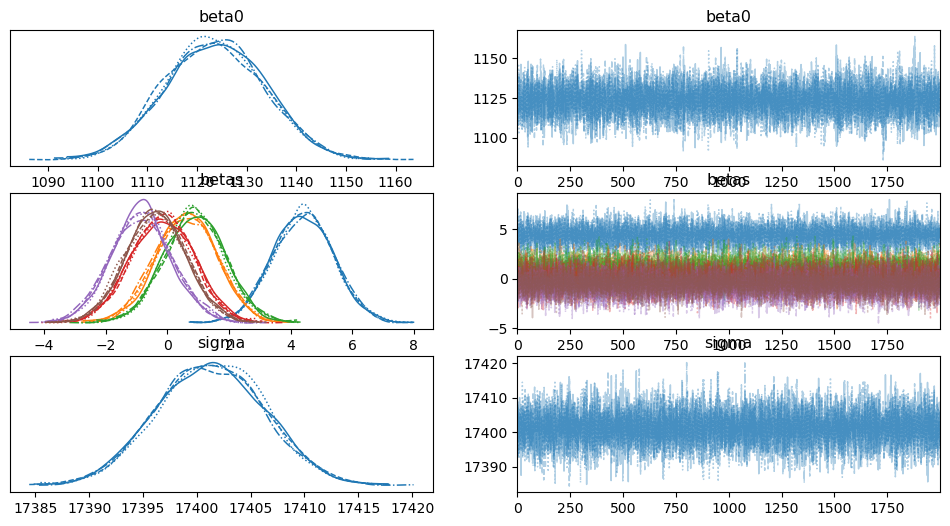

               mean     sd     hdi_3%    hdi_97%  mcse_mean  mcse_sd  \
beta0      1123.627  9.962   1103.743   1140.963      0.081    0.057   
betas[0]      4.409  0.986      2.505      6.191      0.009    0.006   
betas[1]      0.620  0.993     -1.162      2.573      0.008    0.010   
betas[2]      0.885  0.989     -1.022      2.696      0.008    0.009   
betas[3]     -0.156  1.009     -2.022      1.778      0.008    0.012   
betas[4]     -0.839  0.991     -2.770      1.022      0.008    0.009   
betas[5]     -0.367  0.985     -2.184      1.536      0.008    0.011   
sigma     17401.292  5.018  17392.048  17410.749      0.040    0.028   

          ess_bulk  ess_tail  r_hat  
beta0      15169.0    5484.0    1.0  
betas[0]   13446.0    6186.0    1.0  
betas[1]   15202.0    6037.0    1.0  
betas[2]   15303.0    5889.0    1.0  
betas[3]   14290.0    5703.0    1.0  
betas[4]   16022.0    5764.0    1.0  
betas[5]   15210.0    6262.0    1.0  
sigma      15767.0    5791.0    1.0  


In [7]:
#Q2
import pandas as pd

# Load the dataset
dataset_path = "housing.csv"  # Ensure the file is correctly uploaded
data = pd.read_csv(dataset_path)

# Print column names to check
print("Column Names in Dataset:", data.columns.tolist())

features = ['median_income', 'housing_median_age', 'total_rooms', 'population', 'latitude', 'longitude']
target = 'median_house_value'
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset (Ensure it's uploaded in R Notebook environment)
dataset_path = "housing.csv"
data = pd.read_csv(dataset_path)

# Print column names to verify
print("Columns in dataset:", data.columns.tolist())

# Select correct features based on dataset structure
features = ['median_income', 'housing_median_age', 'total_rooms', 'population', 'latitude', 'longitude']
target = 'median_house_value'

# Extract predictor and response variables
X = data[features]
y = data[target].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Number of predictors
p = X_train.shape[1]

# Define Bayesian Linear Regression Model
with pm.Model() as model:
    # Priors
    beta0 = pm.Normal('beta0', mu=0, sigma=10)  # Intercept prior
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)  # Regression coefficients prior
    sigma = pm.HalfNormal('sigma', sigma=10)  # Error term prior
    
    # Linear model
    mu = beta0 + pm.math.dot(X_train, betas)
    
    # Likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y_train)
    
    # Sampling
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.9)

# Plot MCMC diagnostics
az.plot_trace(trace)
plt.show()

# Posterior summary
summary = az.summary(trace)
print(summary)


Columns in dataset: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, betas, nu, tau, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 457 seconds.


             mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta0      12.524  9.895   -5.783   31.224      0.076    0.073   16860.0   
betas[0]   -0.049  1.000   -1.927    1.790      0.008    0.012   16249.0   
betas[1]    0.002  1.008   -1.902    1.872      0.008    0.012   15127.0   
betas[2]   -0.027  0.998   -1.914    1.794      0.007    0.012   19655.0   
betas[3]   -0.013  1.023   -1.838    1.970      0.008    0.014   16368.0   
betas[4]    0.001  1.014   -1.782    2.044      0.008    0.014   15781.0   
betas[5]    0.012  0.988   -1.813    1.848      0.008    0.012   14685.0   
nu          0.144  0.001    0.141    0.146      0.000    0.000   16665.0   
sigma     487.132  7.350  473.347  500.699      0.062    0.044   14252.0   
tau         1.008  0.717    0.031    2.246      0.006    0.006   14166.0   

          ess_tail  r_hat  
beta0       6008.0    1.0  
betas[0]    6095.0    1.0  
betas[1]    6062.0    1.0  
betas[2]    6093.0    1.0  
betas[3]    5510.0    1

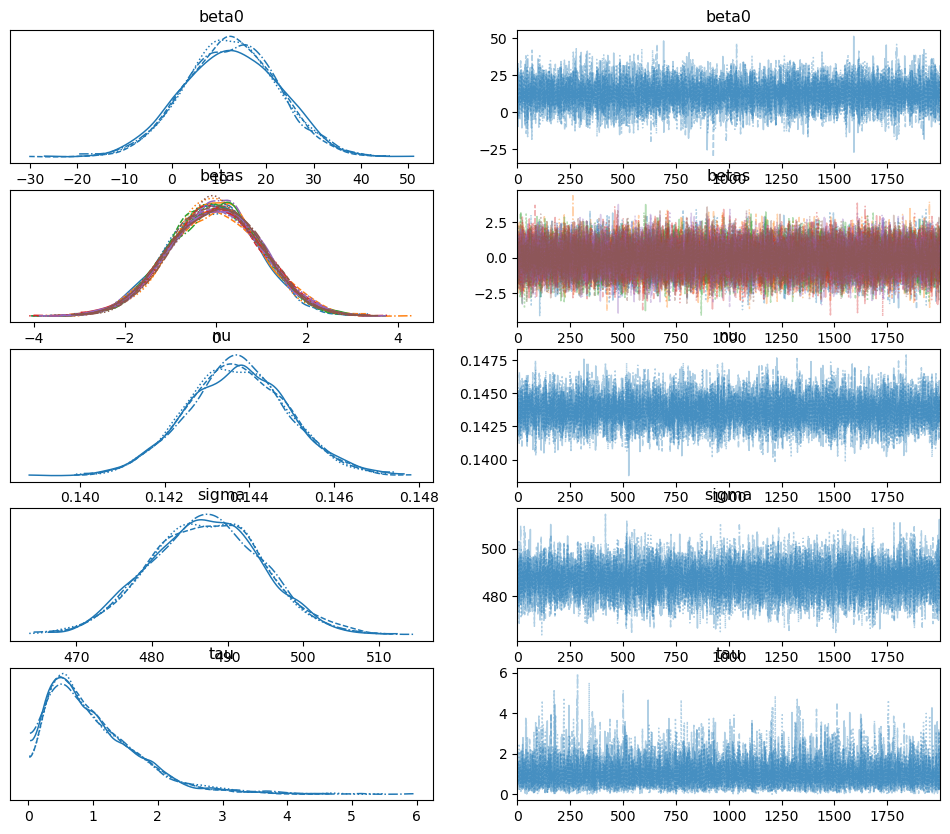

In [9]:
#Q3
# Import necessary libraries
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset (Ensure it's uploaded in R Notebook environment)
dataset_path = "housing.csv"
data = pd.read_csv(dataset_path)

# Print column names to verify
print("Columns in dataset:", data.columns.tolist())

# Select relevant features based on dataset
features = ['median_income', 'housing_median_age', 'total_rooms', 'population', 'latitude', 'longitude']
target = 'median_house_value'

# Extract predictor and response variables
X = data[features]
y = data[target].values

# Introduce outliers: Inflate house prices for a random 5% of the dataset
np.random.seed(42)
outlier_indices = np.random.choice(data.index, size=int(0.05 * len(data)), replace=False)
data.loc[outlier_indices, target] *= 3

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Number of predictors
p = X_train.shape[1]

# Define Robust Bayesian Linear Regression Model
with pm.Model() as robust_model:
    # Priors
    beta0 = pm.Normal('beta0', mu=0, sigma=10)  # Intercept prior
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)  # Regression coefficients prior
    nu = pm.Exponential('nu', 1/30)  # Prior for degrees of freedom (t-distribution)
    tau = pm.Gamma('tau', alpha=2, beta=2)  # Precision parameter
    sigma = pm.HalfNormal('sigma', sigma=10)  # Error term prior
    
    # Linear model
    mu = beta0 + pm.math.dot(X_train, betas)
    
    # Likelihood using Student's t-distribution (handles outliers better)
    y_obs = pm.StudentT('y_obs', mu=mu, sigma=sigma, nu=nu, observed=y_train)
    
    # Sampling
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.9)

# Summary of the posterior
summary = az.summary(trace)
print(summary)

# Trace plots
az.plot_trace(trace)
plt.show()
